In [2]:
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from SA_convo_analysis_functions import get_ec_matrix,get_ec_events,compute_erp_synchrony
from SA_convo_analysis_functions import get_convo_turns,get_turn_events,get_ec_turn_events,compute_erp_turn_synchrony
from scipy.stats import sem, ttest_rel

In [1]:
base_directory = '/Users/sophie/Dropbox/EyeContactinConversation'

### Figure 1. Synchrony curves at a range of timescales

In [2]:
#get mutual eye contact matrix
ec_dir = '{0}/Analyses/eye_contact/mutual'.format(base_directory)
ecmutualfiles = glob.glob('{0}/*_ecCorrespond.txt'.format(ec_dir))
ec_matrix = get_ec_matrix(ecmutualfiles,datalen=600000)

#get eye contact onsets and offsets
ec_all, none_all = get_ec_events(ec_matrix)

#read in pre-computed synchrony matrix (for speed -- to re-create, run SA_DTW_timeseries.py)
dtw_dir = '{0}/Analyses'.format(base_directory)
dtw_long = pd.read_csv('{0}/dyad_dtw_timeseries.csv'.format(dtw_dir))
dtw_matrix = np.reshape(np.array(dtw_long['dtw']),(47,600))

/Users/sophie/Dropbox (Dartmouth College)/SA_Scripts/SA_convo_preprocessing_functions.py:43: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.vstack( a[i:i+(winsize):1] for i in range(0,width,int(winsize*stepsize)))


In [3]:
#extract synchrony around eye contact onsets and offsets
dyads = np.arange(0,46)
#specify what your before and after should be!
before=20
after=20
onset, offset = compute_erp_synchrony(dtw_matrix,ec_all,none_all,dyads,before=before,after=after)

Text(0.5, 2, 'Offset of Eye Contact')

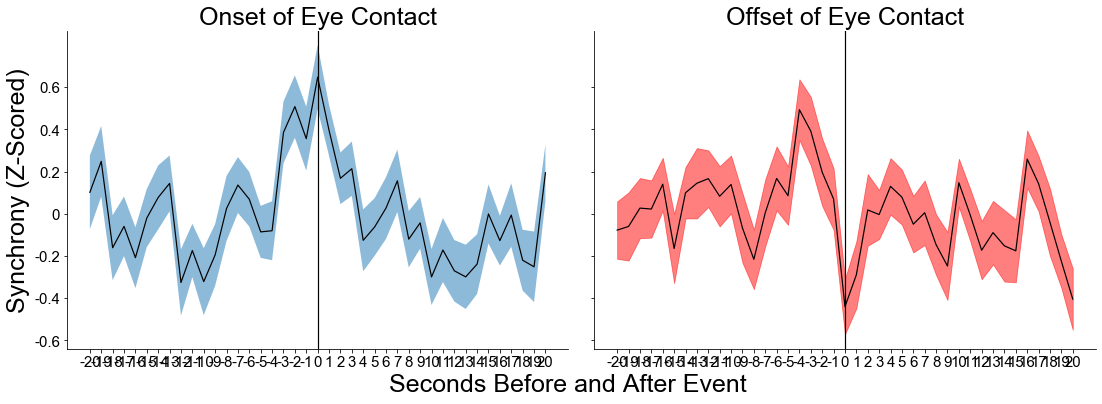

In [4]:
#make an x value to represent time
x = np.arange(-before,after+1,1)

#compute standard error of the mean for plots
sem_onset = sem(onset,nan_policy='omit')
sem_offset = sem(offset,nan_policy='omit')

#figure params
fig,ax=plt.subplots(1,2,figsize=(15,5),sharex =True, sharey=True)
sns.despine()
sns.set_context('paper')
plt.tight_layout()
font = {'fontname':'Arial'}

#plot the average synchrony around the onset of eye contact
ax[0].plot(x,np.nanmean(onset,axis=0),color = 'k')
f1 = ax[0].fill_between(x,np.nanmean(onset,axis=0)-sem_onset,
                        np.nanmean(onset,axis=0)+sem_onset,alpha =0.5)
#plot the average synchrony around the offset of eye contact
ax[1].plot(x,np.nanmean(offset,axis=0),color = 'k')
f2 = ax[1].fill_between(x,np.nanmean(offset,axis=0)-sem_offset,
                        np.nanmean(offset,axis=0)+sem_offset,alpha = 0.5,color='red')
#set axis values and labels
ax[0].set_xlabel("Seconds Before and After Event",**font,size = 25,position=(1,-.1))
ax[0].set_ylabel("Synchrony (Z-Scored)",**font,size = 25)
ax[0].set_xticks(x)
ax[0].set_xticklabels([str(val)for val in x],**font,size=15)
ax[1].set_xticks(x)
ax[1].set_xticklabels([str(val)for val in x],**font,size=15)
ax[0].set_yticks([-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6])
ax[0].set_yticklabels(('-0.6','-0.4','-0.2','0','0.2','0.4','0.6'),**font,size=15)
#draw vertical lines to represent onset and offset
ax[0].axvline(color='black')
ax[1].axvline(color='black')
#set titles
ax[0].set_title('Onset of Eye Contact',**font,position=(0.5,2),size = 25)
ax[1].set_title('Offset of Eye Contact',**font,position=(0.5,2),size = 25)


### Figure 2. Eye Contact plots with naturalistic data controls

In [5]:
#extract synchrony around eye contact onsets and offsets
dyads = np.arange(0,46)
onset, offset = compute_erp_synchrony(dtw_matrix,ec_all,none_all,dyads,drop_subs=True,spaced=True)

/Users/sophie/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/stats/stats.py:2413: RuntimeWarning: Mean of empty slice
  mns = np.nanmean(a=a, axis=axis, keepdims=True)
/Users/sophie/anaconda3/envs/python37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Text(-5, 1.1, 'B')

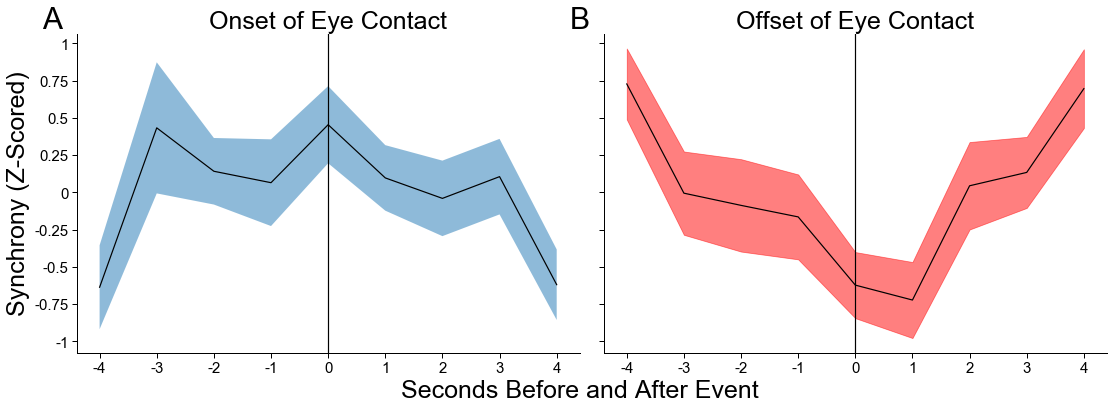

In [30]:
#make an x value to represent time
before=4
after=4
x = np.arange(-before,after+1,1)

#compute standard error of the mean for plots
sem_onset = sem(onset,nan_policy='omit')
sem_offset = sem(offset,nan_policy='omit')

#figure params
fig,ax=plt.subplots(1,2,figsize=(15,5),sharex =True, sharey=True)
sns.despine()
sns.set_context('paper')
plt.tight_layout()
font = {'fontname':'Arial'}

#plot the average synchrony around the onset of eye contact
ax[0].plot(x,np.nanmean(onset,axis=0),color = 'k')
f1 = ax[0].fill_between(x,np.nanmean(onset,axis=0)-sem_onset,
                        np.nanmean(onset,axis=0)+sem_onset,alpha =0.5)
#plot the average synchrony around the offset of eye contact
ax[1].plot(x,np.nanmean(offset,axis=0),color = 'k')
f2 = ax[1].fill_between(x,np.nanmean(offset,axis=0)-sem_offset,
                        np.nanmean(offset,axis=0)+sem_offset,alpha = 0.5,color='red')
#set axis values and labels
ax[0].set_xlabel("Seconds Before and After Event",**font,size = 25,position=(1,-.1))
ax[0].set_ylabel("Synchrony (Z-Scored)",**font,size = 25)
ax[0].set_xticks(x)
ax[0].set_xticklabels([str(val)for val in x],**font,size=15)
ax[1].set_xticks(x)
ax[1].set_xticklabels([str(val)for val in x],**font,size=15)
ax[0].set_yticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax[0].set_yticklabels([str(val)for val in [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]],**font,size=15)
#draw vertical lines to represent onset and offset
ax[0].axvline(color='black')
ax[1].axvline(color='black')
#set titles
ax[0].set_title('Onset of Eye Contact',**font,position=(0.5,2),size = 25)
ax[1].set_title('Offset of Eye Contact',**font,position=(0.5,2),size = 25)
ax[0].text(-5,1.1,'A',**font,size=30)
ax[1].text(-5,1.1,'B',**font,size=30)


In [8]:
#now save the onsets at a range of minimum trial thresholds
trial_minimums = [20,25,30,35,40,45]
#initialize some variables
cutoffs=[]
cutoff_onset = []
cutoff_onset_sems = []
cutoff_offset = []
cutoff_offset_sems = []
for trial_min in trial_minimums:
    onset, offset = compute_erp_synchrony(dtw_matrix,ec_all,none_all,dyads,
                                          trialcutoff=trial_min,drop_subs=True,spaced=True)
    sem_onset = sem(onset,nan_policy='omit')
    sem_offset = sem(offset,nan_policy='omit')
    cutoffs.append(trial_min)
    cutoff_onset.append(np.nanmean(onset,axis=0)[4])
    cutoff_onset_sems.append(sem_onset[4])
    cutoff_offset.append(np.nanmean(offset,axis=0)[4])
    cutoff_offset_sems.append(sem_offset[4])

Text(0.5, 1, 'Offset of Eye Contact')

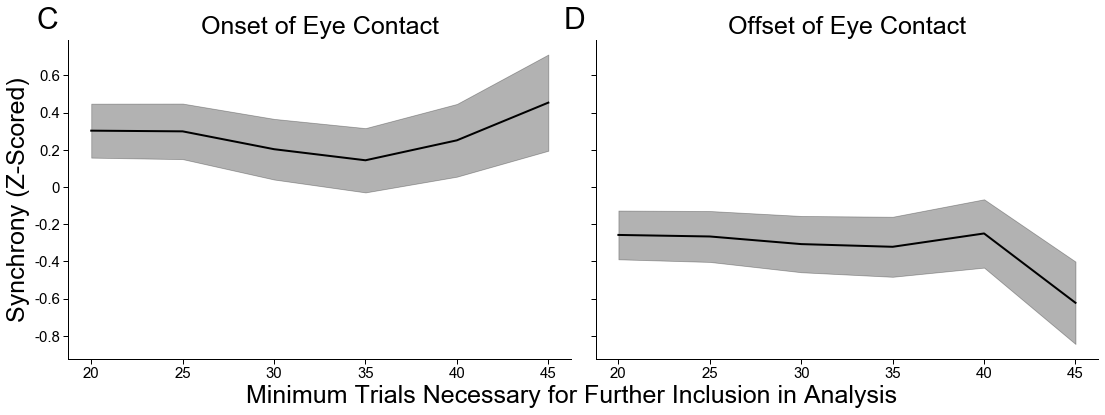

In [9]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharex =True, sharey=True)
sns.despine()
sns.set_context('paper')
plt.tight_layout()

ax[0].plot(cutoffs,cutoff_onset,color='black',linewidth=2)
f1 = ax[0].fill_between(cutoffs,cutoff_onset-np.array(cutoff_onset_sems),
                        cutoff_onset+np.array(cutoff_onset_sems),color='k',alpha =0.3)
ax[1].plot(cutoffs,cutoff_offset,color='black',linewidth=2)
f1 = ax[1].fill_between(cutoffs,cutoff_offset-np.array(cutoff_offset_sems),
                        cutoff_offset+np.array(cutoff_offset_sems),color='k',alpha =0.3)

ax[0].set_xlabel("Minimum Trials Necessary for Further Inclusion in Analysis",**font,size = 25,position=(1,-.1))
ax[0].set_ylabel("Synchrony (Z-Scored)",**font,size = 25)

ax[0].text(17,0.85,'C',**font,size=30)
ax[1].text(17,0.85,'D',**font,size=30)

ax[0].set_xticks([20,25,30,35,40,45])
ax[0].set_xticklabels(('20','25','30','35','40','45'),**font,size=15)
ax[1].set_xticks([20,25,30,35,40,45])
ax[1].set_xticklabels(('20','25','30','35','40','45'),**font,size=15)
ax[0].set_yticks([-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6])
ax[0].set_yticklabels(('-0.8','-0.6','-0.4','-0.2','0','0.2','0.4','0.6'),**font,size=15)

ax[0].set_title('Onset of Eye Contact',**font,size = 25)
ax[1].set_title('Offset of Eye Contact',**font,size = 25)

### Figure 3. Comparing eye contact within vs between conversation turns

In [9]:
#get conversation turns
turndir = '{0}/Data/transcript_timestamps'.format(base_directory)
turnfiles = glob.glob('{0}/*timestampsOnly.csv'.format(turndir))

turnseries = get_convo_turns(turnfiles)
turn_all = get_turn_events(turnseries)

#get eye contact during and between turns
ec_dir = '{0}/Analyses/eye_contact/mutual'.format(base_directory)
ecmutualfiles = glob.glob('{0}/*_ecCorrespond.txt'.format(ec_dir))
onsets, onsets_noturn = get_ec_turn_events(ecmutualfiles,turn_all)

#read in pre-computed synchrony matrix (for speed -- to re-create, run SA_DTW_timeseries.py)
dtw_dir = '{0}/Analyses'.format(base_directory)
dtw_long = pd.read_csv('{0}/dyad_dtw_timeseries.csv'.format(dtw_dir))
dtw_matrix = np.reshape(np.array(dtw_long['dtw']),(47,600))

#find synchrony at eye contact during and between turns
ec_turn, ec_noturn = compute_erp_turn_synchrony(dtw_matrix,onsets,onsets_noturn)

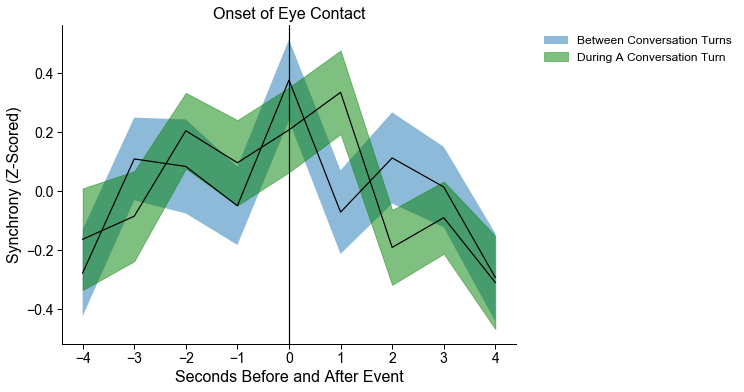

In [12]:
before=4
after=4
x = np.arange(-before,after+1,1)
font = {'fontname':'Arial'}

sem_turn = sem(ec_turn,nan_policy='omit')
sem_noturn = sem(ec_noturn,nan_policy='omit')

fig,ax=plt.subplots(figsize=(7,5))
sns.despine()
sns.set_context('paper')
plt.tight_layout()


ax.plot(x,np.nanmean(ec_turn,axis=0),color = 'k')
f1 = ax.fill_between(x,np.nanmean(ec_turn,axis=0)-sem_turn,
                        np.nanmean(ec_turn,axis=0)+sem_turn,alpha =0.5,label = "Between Conversation Turns")
ax.plot(x,np.nanmean(ec_noturn,axis=0),color = 'k',)
f2 = ax.fill_between(x,np.nanmean(ec_noturn,axis=0)-sem_noturn,
                        np.nanmean(ec_noturn,axis=0)+sem_noturn,alpha = 0.5,color='green',
                        label = "During A Conversation Turn")
ax.set_xlabel("Seconds Before and After Event",**font,size = 16)
ax.set_ylabel("Synchrony (Z-Scored)",**font,size = 16)
ax.axvline(color='black')
plt.xticks(**font,size=14)
plt.yticks(**font,size=14)

ax.legend(prop={'family':'Arial', 'size':12},frameon=False,
             loc=0,bbox_to_anchor=(0.75, 0.5, 0.75, 0.5))

ax.set_title('Onset of Eye Contact',**font,position=(0.5,1.1),size = 16)

In [11]:
#just to confirm they aren't different along any point in the synchrony curve
ttest_rel(ec_turn,ec_noturn)

Ttest_relResult(statistic=array([-0.48037112,  1.13702034, -0.5735847 , -0.73822318,  0.86347541,
       -1.82259998,  1.51998411,  0.57537311,  0.07456465]), pvalue=array([0.63324019, 0.26141817, 0.56904275, 0.46412861, 0.39235615,
       0.07486772, 0.13535931, 0.56784302, 0.94088443]))

In [13]:
#how much eye contact occurs during vs between turns?
numTurnOnsets = []
numNoTurnOnsets = [] 
for num,(turnOnset,noTurnOnset) in enumerate(zip(onsets,onsets_noturn)):
    numTurnOnsets.append(len(turnOnset))
    numNoTurnOnsets.append(len(noTurnOnset))
    
noturnOnset_pct = []
turnOnset_pct = []
for (noTurnonset,turnonset) in zip(numNoTurnOnsets,numTurnOnsets):
    noturnOnset_pct.append(noTurnonset / (turnonset + noTurnonset))
    turnOnset_pct.append(turnonset / (turnonset + noTurnonset))
    
ttest_rel(numTurnOnsets,numNoTurnOnsets)

Ttest_relResult(statistic=7.81944193162696, pvalue=5.465616891123404e-10)

### Figure 4. Engagement analysis permutations

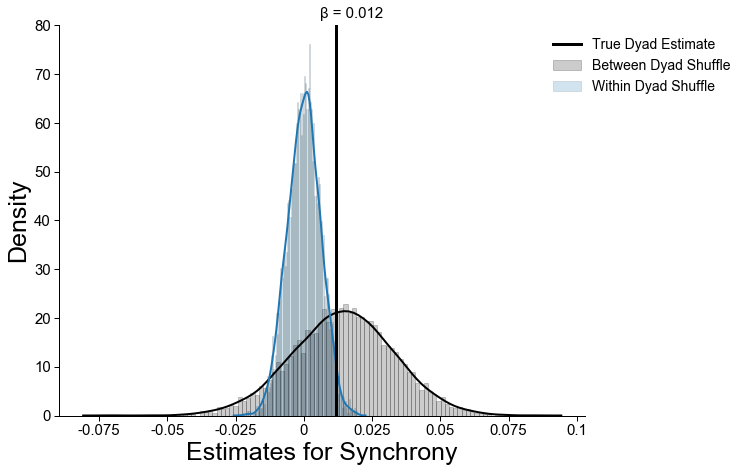

In [38]:
#set to your current directory
ec_dir = '{0}/Analyses'.format(base_directory)
bwsub_pseudo_ests = pd.read_csv('{0}/pseudo_ests_betweenSubEngage.csv'.format(ec_dir))
winsub_pseudo_ests = pd.read_csv('{0}/pseudo_ests_withinSubEngage.csv'.format(ec_dir))
true_sync_est = 0.01164
true_ec_est = 0.02745
true_int_est = -0.01692
font = {'fontname':'Arial'}

true_est = true_sync_est
bw_pseudo_ests = bwsub_pseudo_ests['pseudo_sync_ests']
win_pseudo_ests = winsub_pseudo_ests['pseudo_sync_ests']

fig,ax=plt.subplots(figsize=(8,6))
sns.despine()
sns.set_context('paper')
plt.tight_layout()

sns.distplot(bw_pseudo_ests,color='black',
             hist_kws=dict(color='k',alpha=0.2,edgecolor='k',linewidth=1),
             kde_kws=dict(linewidth=2),bins=100,label='Between Dyad Shuffle')
sns.distplot(win_pseudo_ests,
             hist_kws=dict(alpha=0.2,edgecolor='k',linewidth=0.5),
             kde_kws=dict(linewidth=2),bins=100,label='Within Dyad Shuffle')
ax.set_xticks([-0.04,-0.02,0,0.02,0.04])
ax.set_xticklabels(('-0.04','-0.02','0','0.02','0.04'),**font,size=15)
ax.set_yticks([0,10,20,30,40])
ax.set_yticklabels(('0','10','20','30','40'),**font,size=15)
ax.set_ylabel('Density',**font,size=25)
ax.axvline(true_est,color='black',linewidth=3, label = 'True Dyad Estimate')

if true_est == true_ec_est:
    ax.text(0.023,46.5,'\u03B2 = 0.028*',**font,size=15)
    ax.set_xlabel('Estimates for Eye Contact',**font,size=25)
elif true_est == true_sync_est:
    ax.text(0.006,81.5,'\u03B2 = 0.012',**font,size=15)
    ax.set_xticks([-0.075,-0.05,-0.025,0,0.025,0.05,0.075,0.1])
    ax.set_xticklabels(('-0.075','-0.05','-0.025','0','0.025','0.05','0.075','0.1'),**font,size=15)
    ax.set_yticks([0,10,20,30,40,50,60,70,80])
    ax.set_yticklabels(('0','10','20','30','40','50','60','70','80'),**font,size=15)
    ax.set_xlabel('Estimates for Synchrony',**font,size=25)
else:
    ax.text(-0.023,46,'\u03B2 = -0.017',**font,size=15)
    ax.set_xlabel('Estimates for Eye Contact * Synchrony',**font,size=25)



ax.legend(prop={'family':'Arial', 'size':14},frameon=False,
             loc=0,bbox_to_anchor=(0.65, 0.5, 0.65, 0.5))